## Clustering con K-means
Questa lezione e la prossima utilizzano i cosiddetti **algoritmi di apprendimento non supervisionato**. Gli **algoritmi non supervisionati** non fanno uso di un target; il loro scopo è invece quello di apprendere alcune proprietà dei dati, per rappresentare la struttura delle caratteristiche in un certo modo. Nel contesto dell'ingegneria delle caratteristiche per la predizione, si può pensare a un **algoritmo non supervisionato** come a una tecnica di "**scoperta delle caratteristiche**".

Per **clustering** si intende semplicemente l'assegnazione di punti di dati a gruppi basati sulla somiglianza dei punti tra loro. Un algoritmo di clustering fa sì che "gli uccelli di una stessa piuma si riuniscano", per così dire.

Se utilizzato per l'**ingegneria delle caratteristiche**, potremmo cercare di scoprire gruppi di clienti che rappresentano un segmento di mercato, ad esempio, o aree geografiche che condividono modelli meteorologici simili. L'aggiunta di una caratteristica di **etichette di cluster** può aiutare i modelli di apprendimento automatico a districarsi tra complicate relazioni di spazio o di prossimità.

### Le etichette dei cluster come caratteristica
Applicato a una singola caratteristica a valore reale, il clustering agisce come una tradizionale **trasformazione di "binning"** o **"discretizzazione"**. Su più caratteristiche, è come un "**binning multidimensionale**" (talvolta chiamato quantizzazione vettoriale).

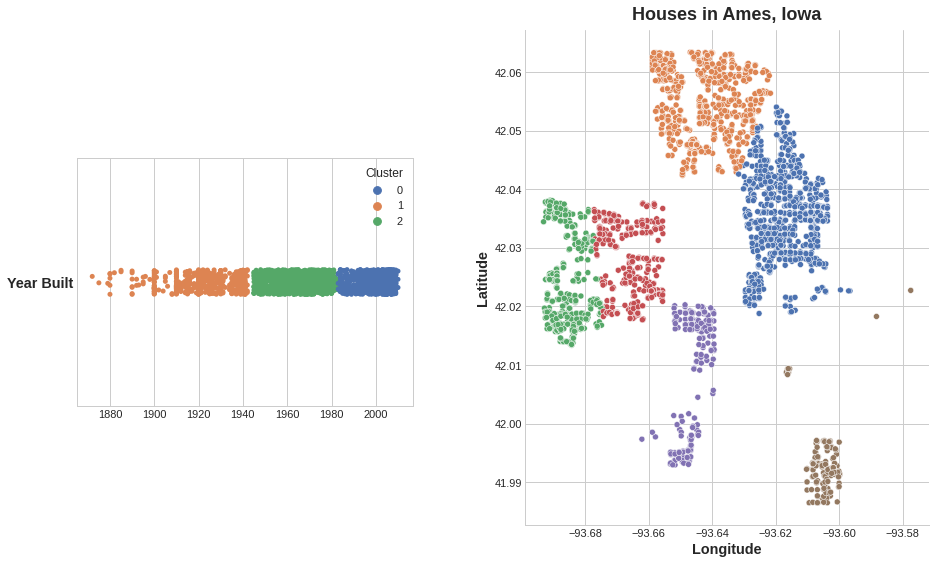

A sinistra: raggruppamento di una singola caratteristica. A destra: Raggruppamento di due caratteristiche.
Aggiunta a un dataframe, una caratteristica delle etichette dei cluster potrebbe apparire come segue:

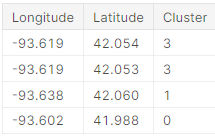

È importante ricordare che questa caratteristica `Cluster` è categorica. Qui è mostrata con una **codifica di etichette** (cioè come una sequenza di numeri interi) come quella che produrrebbe un tipico algoritmo di clustering; a seconda del modello, potrebbe essere più appropriata una codifica a un punto.

L'idea che motiva l'aggiunta di **etichette ai cluster** è che i cluster spezzeranno le relazioni complicate tra le caratteristiche in parti più semplici. Il nostro modello può quindi imparare i pezzi più semplici uno per uno, invece di dover imparare l'insieme complicato tutto in una volta. È una strategia "divide et impera".

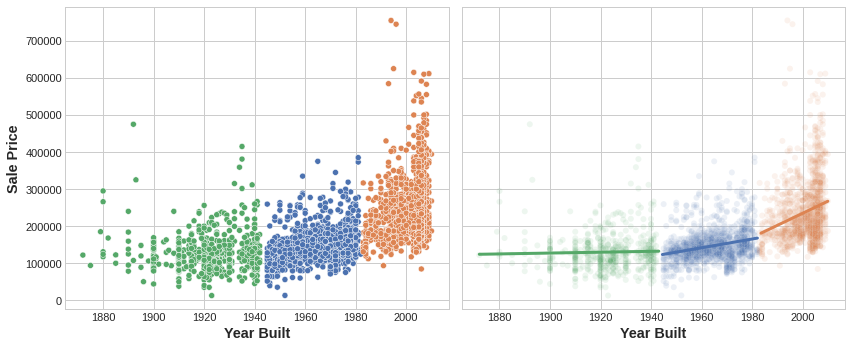

La figura mostra come il **clustering** possa migliorare un semplice modello lineare. La relazione curva tra l'Anno di costruzione e il Prezzo di vendita è troppo complicata per questo tipo di modello, che si adatta male. Su pezzi più piccoli, invece, la relazione è quasi lineare e il modello può imparare facilmente.

## Clustering k-Means
Esistono numerosi **algoritmi di clustering**. Si differenziano principalmente per il modo in cui misurano la "somiglianza" o la "prossimità" e per il tipo di caratteristiche con cui lavorano. L'algoritmo che utilizzeremo, `k-means`, è intuitivo e facile da applicare in un contesto di **feature engineering**. A seconda della vostra applicazione, un altro algoritmo potrebbe essere più appropriato.

Il **clustering K-means** misura la somiglianza utilizzando la normale distanza rettilinea (la distanza euclidea, in altre parole). Crea i cluster posizionando un certo numero di punti, chiamati centroidi, all'interno dello spazio delle caratteristiche. Ogni punto del set di dati viene assegnato al cluster del centroide a cui è più vicino. La "k" di "`k-means`" indica il numero di centroidi (cioè di cluster) creati. È l'utente stesso a definire il k.

Si potrebbe immaginare che ogni centroide catturi i punti attraverso una sequenza di cerchi radianti. Quando gli insiemi di cerchi provenienti da centroidi concorrenti si sovrappongono, formano una linea. Il risultato è la cosiddetta tassellatura di Voronoi. La tassellatura mostra a quali cluster saranno assegnati i dati futuri; la tassellatura è essenzialmente ciò che `k-means` impara dai suoi dati di addestramento.

Il clustering sul set di dati Ames di cui sopra è un **clustering k-means**. Ecco la stessa figura con la tassellatura e i centroidi.

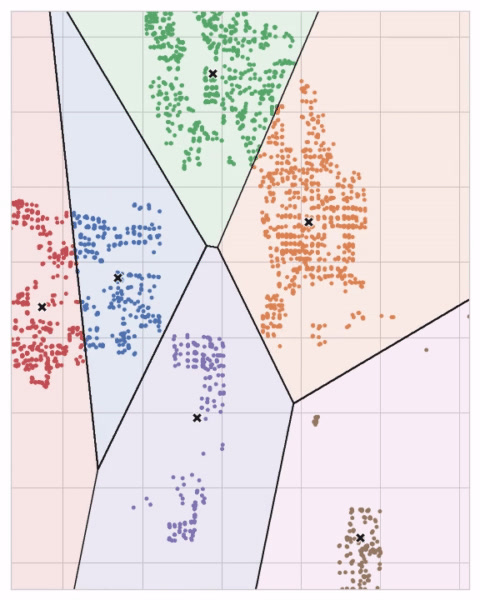

Vediamo come l'**algoritmo k-means** apprende i cluster e cosa significa per l'ingegneria delle caratteristiche. Ci concentreremo su tre parametri dell'implementazione di `scikit-learn`: `n_cluster`, `max_iter` e `n_init`.

Si tratta di un semplice processo in **due fasi**. L'algoritmo inizia inizializzando in modo casuale un numero predefinito (n_cluster) di centroidi. Quindi itera su queste due operazioni:

1. assegna i punti al centroide del cluster più vicino
1. spostare ogni centroide per minimizzare la distanza dai suoi punti.

L'iterazione di questi due passaggi avviene fino a quando i centroidi non si muovono più o fino a quando non è trascorso un numero massimo di iterazioni (``max_iter``).

Spesso accade che la posizione iniziale casuale dei centroidi porti a un clustering scadente. Per questo motivo l'algoritmo ripete un certo numero di volte (`n_init`) e restituisce il raggruppamento che ha la minore distanza totale tra ogni punto e il suo centroide, il raggruppamento ottimale.

L'animazione sottostante mostra l'algoritmo in azione. Illustra la dipendenza del risultato dai centroidi iniziali e l'importanza di iterare fino alla convergenza.

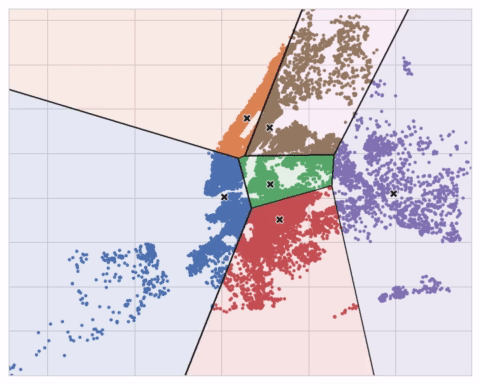 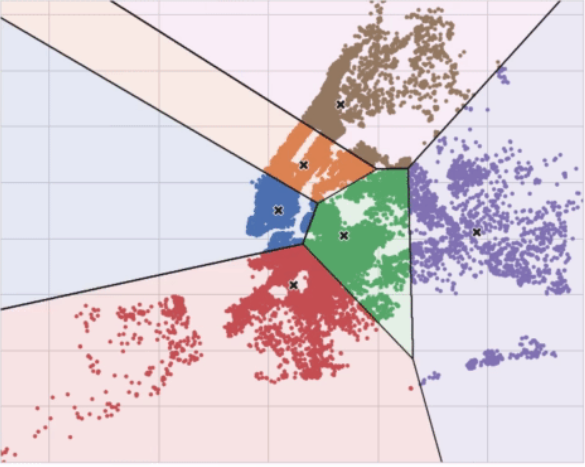

Potrebbe essere necessario aumentare `max_iter` per un numero elevato di cluster o `n_init` per un insieme di dati complesso. In genere, però, l'unico parametro da scegliere è `n_cluster` (cioè k). La migliore suddivisione per un insieme di caratteristiche dipende dal modello che si sta utilizzando e da ciò che si sta cercando di prevedere, per cui è meglio metterlo a punto come qualsiasi altro iperparametro (ad esempio, attraverso la convalida incrociata).

### Esempio 
**California Housing**
Come caratteristiche spaziali, "Latitudine" e "Longitudine" di California Housing sono candidati naturali per il clustering k-means. In questo esempio li raggrupperemo con 'MedInc' (reddito mediano) per creare segmenti economici in diverse regioni della California.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

df = pd.read_csv("D:/Users/Alessio/OneDrive/Python/Kaggle/Feature Engineering/housing.csv")
X = df.loc[:, ["MedInc", "Latitude", "Longitude"]]
X.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


Poiché il clustering k-means è sensibile alla scala, può essere una buona idea ridimensionare o normalizzare i dati con valori estremi. Le nostre caratteristiche sono già approssimativamente nella stessa scala, quindi le lasceremo così come sono.

In [2]:
# Create cluster feature
kmeans = KMeans(n_clusters=6)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

X.head()

,MedInc,Latitude,Longitude,Cluster
0,8.3252,37.88,-122.23,3
1,8.3014,37.86,-122.22,3
2,7.2574,37.85,-122.24,3
3,5.6431,37.85,-122.25,3
4,3.8462,37.85,-122.25,0


Ora analizziamo un paio di grafici per vedere quanto sia stato efficace. Innanzitutto, un grafico a dispersione che mostra la distribuzione geografica dei cluster. Sembra che l'algoritmo abbia creato segmenti separati per le aree a reddito più elevato sulle coste.

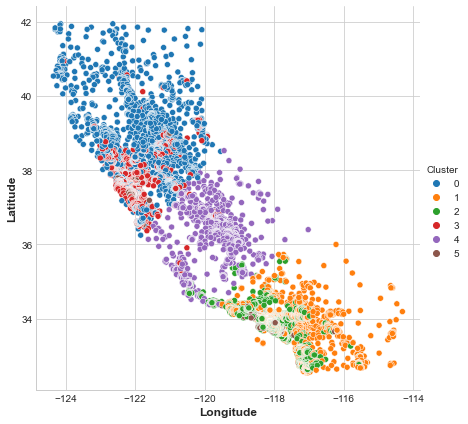

In [3]:
sns.relplot(
    x="Longitude", y="Latitude", hue="Cluster", data=X, height=6,
);

L'obiettivo in questo set di dati è MedHouseVal (valore mediano della casa). Questi box-plot mostrano la distribuzione dell'obiettivo all'interno di ciascun cluster. Se il clustering è informativo, queste distribuzioni dovrebbero, per la maggior parte, separarsi da MedHouseVal, il che è effettivamente ciò che vediamo.

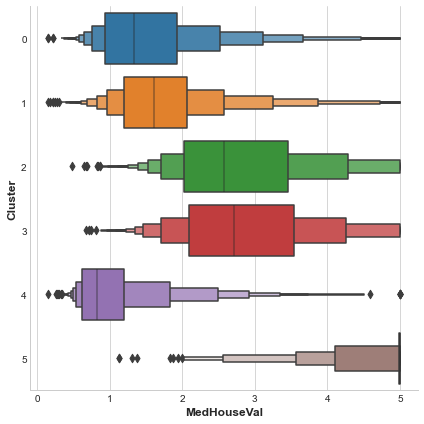

In [4]:
X["MedHouseVal"] = df["MedHouseVal"]
sns.catplot(x="MedHouseVal", y="Cluster", data=X, kind="boxen", height=6);

## Esercizi
In questo esercizio esploreremo la nostra prima tecnica di apprendimento non supervisionato per la creazione di caratteristiche, il clustering k-means.

Eseguite questa cella per impostare tutto!

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

In [7]:
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

In [8]:
def score_dataset(X, y, model=XGBRegressor()):
    # Label encoding for categoricals
    for colname in X.select_dtypes(["category", "object"]):
        X[colname], _ = X[colname].factorize()
    # Metric for Housing competition is RMSLE (Root Mean Squared Log Error)
    score = cross_val_score(
        model, X, y, cv=5, scoring="neg_mean_squared_log_error",
    )
    score = -1 * score.mean()
    score = np.sqrt(score)
    return score

In [9]:
# Prepare data
df = pd.read_csv("D:/Users/Alessio/OneDrive/Python/Kaggle/Feature Engineering/ames.csv")

L'**algoritmo k-means** è sensibile alla scala. Ciò significa che dobbiamo riflettere su come e se ridimensionare le nostre caratteristiche, poiché potremmo ottenere risultati molto diversi a seconda delle nostre scelte. Come regola generale, se le caratteristiche sono già direttamente comparabili (come i risultati di un test in tempi diversi), allora non è il caso di ridimensionarle. D'altra parte, le caratteristiche che non sono su scale comparabili (come l'altezza e il peso) di solito beneficiano del ridimensionamento. A volte, però, la scelta non è chiara. In questo caso, si dovrebbe cercare di usare il buon senso, ricordando che le caratteristiche con valori più grandi saranno ponderate maggiormente.

### Domanda 1
**Scalare le caratteristiche**

Considerate le seguenti serie di caratteristiche. Per ciascuna di esse, decidere se:
- devono assolutamente essere ridimensionate,
- non devono assolutamente essere ridimensionate, oppure
- entrambe potrebbero essere ragionevoli

Caratteristiche:
1. `Latitude` and `Longitude` of cities in California
2. `Lot Area` and `Living Area` of houses in Ames, Iowa
3. `Number of Doors` and `Horsepower` of a 1989 model car

Dopo aver riflettuto sulle vostre risposte, fate girare la cella sottostante per la discussione.

1. No, since rescaling would distort the natural distances described by Latitude and Longitude.
2. Either choice could be reasonable, but because the living area of a home tends to be more valuable per square foot, it would make sense to rescale these features so that lot area isn't weighted in the clustering out of proportion to its effect on SalePrice, if that is what you were trying to predict.
3. Yes, since these don't have comparable units. Without rescaling, the number of doors in a car (usually 2 or 4) would have negligible weight compared to its horsepower (usually in the hundreds).
What you should take away from this is that the decision of whether and how to rescale features is rarely automatic -- it will usually depend on some domain knowledge about your data and what you're trying to predict. Comparing different rescaling schemes through cross-validation can also be helpful. (You might like to check out the preprocessing module in scikit-learn for some of the rescaling methods it offers.)

### Domanda 2
**Creare una caratteristica delle etichette dei cluster**

Creare un clustering k-means con i seguenti parametri:
- features: `LotArea`, `TotalBsmtSF`, `FirstFlrSF`, `SecondFlrSF`,`GrLivArea`
- number of clusters: 10
- iterations: 10

(Il completamento dell'operazione potrebbe richiedere un po' di tempo).

In [10]:
X = df.copy()
y = X.pop("SalePrice")


# YOUR CODE HERE: Define a list of the features to be used for the clustering
features = [
    "LotArea",
    "TotalBsmtSF",
    "FirstFlrSF",
    "SecondFlrSF",
    "GrLivArea",
]

# Standardize
X_scaled = X.loc[:, features]
X_scaled = (X_scaled - X_scaled.mean(axis=0)) / X_scaled.std(axis=0)


# YOUR CODE HERE: Fit the KMeans model to X_scaled and create the cluster labels
kmeans = KMeans(n_clusters=10, n_init=10, random_state=0)
X["Cluster"] = kmeans.fit_predict(X_scaled)


# Check your answer
#q_2.check()

Se si desidera, è possibile eseguire questa cella per vedere il risultato del clustering.

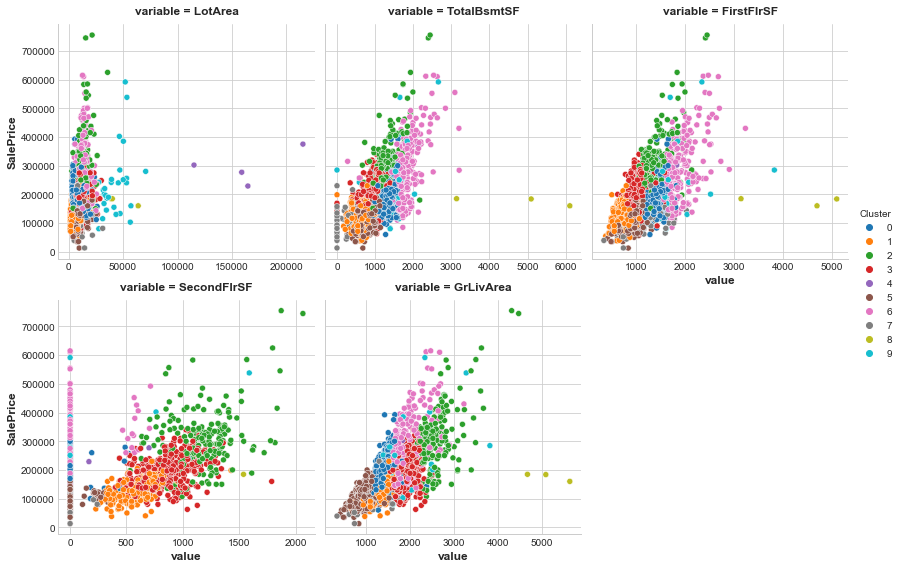

In [11]:
Xy = X.copy()
Xy["Cluster"] = Xy.Cluster.astype("category")
Xy["SalePrice"] = y
sns.relplot(
    x="value", y="SalePrice", hue="Cluster", col="variable",
    height=4, aspect=1, facet_kws={'sharex': False}, col_wrap=3,
    data=Xy.melt(
        value_vars=features, id_vars=["SalePrice", "Cluster"],
    ),
);

E come prima, `score_dataset` assegnerà un punteggio al modello XGBoost con questa nuova caratteristica aggiunta ai dati di allenamento.

In [12]:
score_dataset(X, y)

0.1404632128875517

L'**algoritmo k-means** offre un modo alternativo di creare le caratteristiche. Invece di etichettare ogni caratteristica con il centroide del cluster più vicino, può misurare la distanza di un punto da tutti i centroidi e restituire tali distanze come caratteristiche.

### Domanda 3
**Funzioni di distanza dei cluster**

Aggiungete ora le caratteristiche di distanza dei cluster al vostro set di dati. È possibile ottenere queste caratteristiche di distanza utilizzando il metodo `fit_transform` di `kmeans` invece di `fit_predict`.

In [22]:
kmeans = KMeans(n_clusters=10, n_init=10, random_state=0)


# YOUR CODE HERE: Create the cluster-distance features using `fit_transform`
X_cd = kmeans.fit_transform(X_scaled)


# Label features and join to dataset
X_cd = pd.DataFrame(X_cd, columns=[f"Centroid_{i}" for i in range(X_cd.shape[1])])
X = X + X_cd

# Check your answer
#q_3.check()

In [23]:
score_dataset(X, y)

0.2402930584143469